# Data preprocessing for Diabetes Dataset

In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as pyplot
from collections import Counter

from sklearn import preprocessing

#imbalanced learn resampling functions
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'pandas'

In [3]:
#supress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [4]:
#load diabetes prediction data as a pandas dataframe
df = pandas.read_csv("diabetes-dataset.csv")
display(df.head(20))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


##### 1. Overview of data

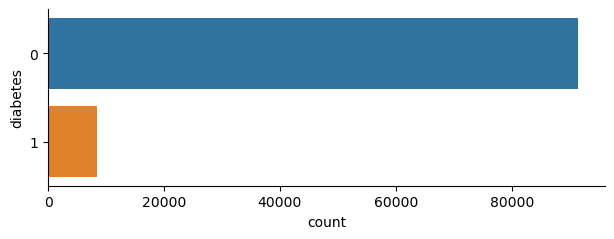

In [5]:
#plot diabetes vs no diabetes to see imbalance
diabetes_plot = seaborn.catplot(
    y="diabetes",
    kind="count",
    data=df,
    orient="h",
    height=2.5,
    aspect=2.5
)

#big imbalance for diabetes vs no diabetes: could mean not enough samples to accurately predict positive matches

In [7]:
#make sure there aren't any numeric fields that are strings
for field in df:
    print(f"{df[field][0]}: {type(df[field][0])}")

Female: <class 'str'>
80.0: <class 'numpy.float64'>
0: <class 'numpy.int64'>
1: <class 'numpy.int64'>
never: <class 'str'>
25.19: <class 'numpy.float64'>
6.6: <class 'numpy.float64'>
140: <class 'numpy.int64'>
0: <class 'numpy.int64'>


##### 2. Deal with 'No Info' smokers

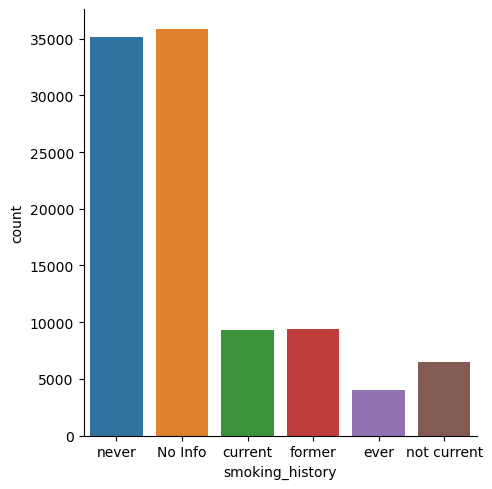

In [8]:
#analysing Smoking History column to sort out "No Info" issue
graph_count = seaborn.catplot(x="smoking_history", data=df, kind="count")

BEFORE
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
AFTER
smoking_history
never          54713
former         14550
current        14491
not current     9991
ever            6255
Name: count, dtype: int64


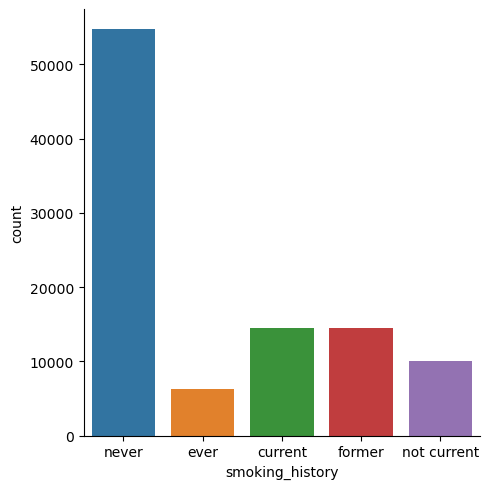

In [9]:
#randomly populate "No Info" with data, but with weights dependant on likelihood
import random

#before
print("BEFORE")
print(df["smoking_history"].value_counts())

smoking_options = ["never", "current", "former", "ever", "not current"]
weights = [df["smoking_history"].value_counts()[field] for field in smoking_options]

smoking_cleaned = df["smoking_history"].copy()
for i, record in enumerate(df["smoking_history"]):
    if record == "No Info":
        smoking_cleaned[i] = random.choices(smoking_options, weights=weights, k=1)[0]

df["smoking_history"] = smoking_cleaned

print("AFTER")
print(df["smoking_history"].value_counts())

graph_count = seaborn.catplot(x="smoking_history", data=df, kind="count")

##### 3. Remove NaNs

In [10]:
#find null values and either replace with the median, or if that column has too many null values, remove it

#numeric columns first: locate NaNs
df_nu = df.select_dtypes(include=["number"])
df_nu = df_nu.loc[:, df_nu.isnull().any()]

print(df_nu.columns)

#fill NaN values with the median
df = df.fillna(df_nu.median())

display(df.head(20))

#(No NaNs found)

Index([], dtype='object')


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,ever,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,never,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [11]:
print(df.mode())

   gender   age  hypertension  heart_disease smoking_history    bmi   
0  Female  80.0             0              0           never  27.32  \

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  130         0  


##### 4. Plot distribution and smoking graphs

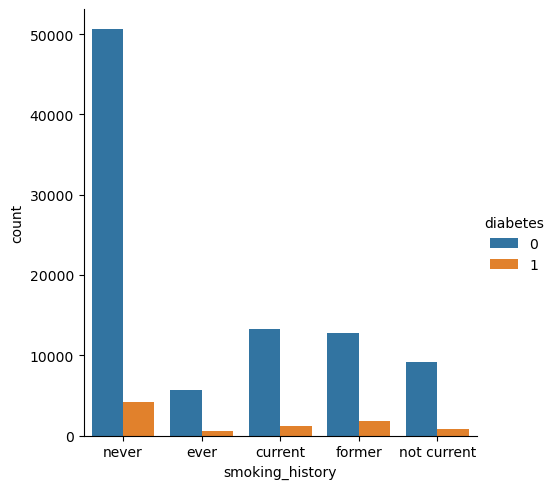

In [12]:
#smoking vs diabetes
seaborn.catplot(hue="diabetes", x="smoking_history", kind="count", data=df)

#no obvious correlation

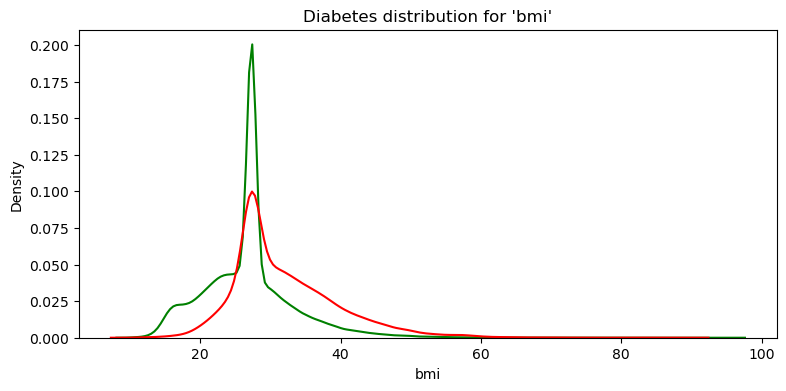

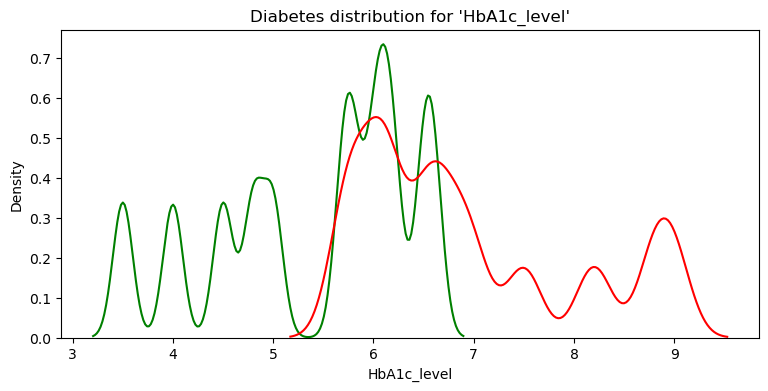

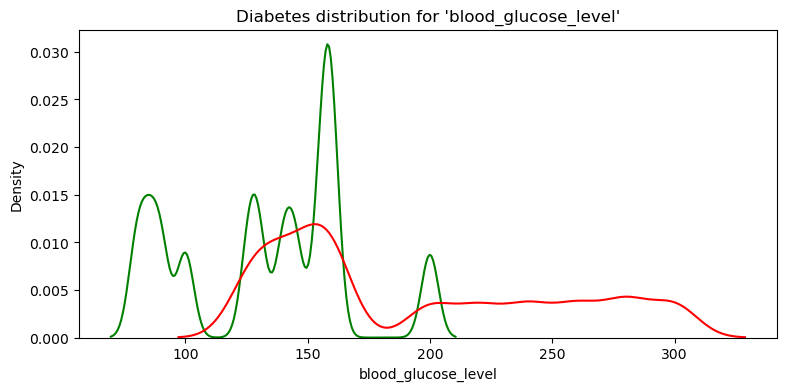

In [13]:
#KDE plots for numerical columns
def kdeplot(column):
    """Create kdeplot for specified column"""
    pyplot.figure(figsize=(9,4))
    pyplot.title(f"Diabetes distribution for '{column}'")
    
    ax1 = seaborn.kdeplot(
        df[df["diabetes"] == 0][column].dropna(),
        color="green",
        label="Does NOT have diabetes"
    )
    
    ax2 = seaborn.kdeplot(
        df[df["diabetes"] == 1][column].dropna(),
        color="red",
        label="Has diabetes",
    )
    
for column in ["bmi", "HbA1c_level", "blood_glucose_level"]:
    kdeplot(column) 
    
#higher HbA1c level would appear to correlate to higher chance of diabetes

In [15]:
print(max(df["bmi"]))

95.69


##### 5. Binary and one-hot encode categorical fields

In [16]:
#cleanup: change binary text fields to 1s and 0s, and change categorical fields to one-hot

df["gender"], _ = pandas.factorize(df["gender"])

#one hot
df = pandas.get_dummies(df, columns=["smoking_history"])
df.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,True,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False
5,0,20.0,0,0,27.32,6.6,85,0,False,False,False,True,False
6,0,44.0,0,0,19.31,6.5,200,1,False,False,False,True,False
7,0,79.0,0,0,23.86,5.7,85,0,False,False,False,True,False
8,1,42.0,0,0,33.64,4.8,145,0,False,False,False,True,False
9,0,32.0,0,0,27.32,5.0,100,0,False,False,False,True,False


##### 6. Normalize the data

In [17]:
#normalization for numerical fields
numericals = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

for field in numericals:
    a = numpy.array(df[field])
    df[field] = preprocessing.normalize([a])[0]
    
df.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0.005320,0,1,0.002833,0.003707,0.003076,0,False,False,False,True,False
1,0,0.003591,0,0,0.003073,0.003707,0.001758,0,False,True,False,False,False
2,1,0.001862,0,0,0.003073,0.003201,0.003471,0,False,False,False,True,False
3,0,0.002394,0,0,0.002638,0.002808,0.003405,0,True,False,False,False,False
4,1,0.005054,1,1,0.002265,0.002696,0.003405,0,True,False,False,False,False
5,0,0.001330,0,0,0.003073,0.003707,0.001867,0,False,False,False,True,False
6,0,0.002926,0,0,0.002172,0.003651,0.004394,1,False,False,False,True,False
7,0,0.005253,0,0,0.002684,0.003201,0.001867,0,False,False,False,True,False
8,1,0.002793,0,0,0.003784,0.002696,0.003186,0,False,False,False,True,False
9,0,0.002128,0,0,0.003073,0.002808,0.002197,0,False,False,False,True,False


##### 7. Fix data imbalance

In [18]:
#sort out the data imbalance
#method 1: SMOTE, synthetically oversampling the minority positive data
X, y = df.drop(columns="diabetes"), df.loc[:, "diabetes"]

print(f"Before: {Counter(y)}")
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print(f"After: {Counter(y_smote)}")

Before: Counter({0: 91500, 1: 8500})
After: Counter({0: 91500, 1: 91500})


In [19]:
#method 2 can combine SMOTE with undersampling of majority for best results
oversample = SMOTE(sampling_strategy=0.1)
undersample = RandomUnderSampler(sampling_strategy=0.5)

resample_steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=resample_steps)

X_overunder, y_overunder = pipeline.fit_resample(X, y)
print(f"Before: {Counter(y)}")
print(f"After: {Counter(y_overunder)}")

Before: Counter({0: 91500, 1: 8500})
After: Counter({0: 18300, 1: 9150})


In [20]:
#write method 2 overunder data to file
df_overunder = X_overunder.join(y_overunder)
df_overunder.to_csv("diabetes-dataset-overunder.csv")

In [21]:
#export cleaned dataframe (no overunder) to csv
df.to_csv("diabetes-dataset-cleaned.csv")